<a href="https://colab.research.google.com/github/wiiloebis/bangkit_machine_learning_assigment/blob/master/videogames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [216]:
# read the Games Sales csv file
Video_Games_Sales = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
Video_Games_Sales = Video_Games_Sales.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
Video_Games_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   Global_Sales     16719 non-null  float64
 6   Critic_Score     8137 non-null   float64
 7   Critic_Count     8137 non-null   float64
 8   User_Score       10015 non-null  object 
 9   User_Count       7590 non-null   float64
 10  Developer        10096 non-null  object 
 11  Rating           9950 non-null   object 
dtypes: float64(5), object(7)
memory usage: 1.5+ MB


In [217]:
columns = ["User_Score"]
for col in columns:
    # convert the column to numeric
    Video_Games_Sales[col] = pd.to_numeric(Video_Games_Sales[col], errors="coerce")

Video_Games_Sales = Video_Games_Sales.drop_duplicates(keep="first", inplace=False)
print(Video_Games_Sales.shape)
Video_Games_Sales = Video_Games_Sales.dropna()
print(Video_Games_Sales.shape)
Video_Games_Sales.info()

(16719, 12)
(6825, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   Global_Sales     6825 non-null   float64
 6   Critic_Score     6825 non-null   float64
 7   Critic_Count     6825 non-null   float64
 8   User_Score       6825 non-null   float64
 9   User_Count       6825 non-null   float64
 10  Developer        6825 non-null   object 
 11  Rating           6825 non-null   object 
dtypes: float64(6), object(6)
memory usage: 693.2+ KB


In [218]:
# print(Video_Games_Sales.Platform.unique())
Video_Games_Sales['Platform'] = Video_Games_Sales['Platform'].astype('category')
cat_columns = Video_Games_Sales.select_dtypes(['category']).columns
cat_columns
Video_Games_Sales[cat_columns] = Video_Games_Sales[cat_columns].apply(lambda x: x.cat.codes)
Video_Games_Sales.iloc[:4,:]
Video_Games_Sales.info()
# print(Video_Games_Sales.Platform.unique())
# labelEncoder_Platform =  LabelEncoder()
# XArray[:,1] = labelEncoder_Platform.fit_transform(XArray[:,1])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   int8   
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   Global_Sales     6825 non-null   float64
 6   Critic_Score     6825 non-null   float64
 7   Critic_Count     6825 non-null   float64
 8   User_Score       6825 non-null   float64
 9   User_Count       6825 non-null   float64
 10  Developer        6825 non-null   object 
 11  Rating           6825 non-null   object 
dtypes: float64(6), int8(1), object(5)
memory usage: 646.5+ KB


In [219]:
print(Video_Games_Sales.Genre.unique())
Video_Games_Sales['Genre'] = Video_Games_Sales['Genre'].astype('category')
cat_columns = Video_Games_Sales.select_dtypes(['category']).columns
cat_columns
Video_Games_Sales[cat_columns] = Video_Games_Sales[cat_columns].apply(lambda x: x.cat.codes)
Video_Games_Sales.iloc[:4,:]
# labelEncoder_Platform =  LabelEncoder()
# XArray[:,3] = labelEncoder_Platform.fit_transform(XArray[:,3])
# print(XArray[:4, :])
# Video_Games_Sales.info()

['Sports' 'Racing' 'Platform' 'Misc' 'Action' 'Puzzle' 'Shooter'
 'Fighting' 'Simulation' 'Role-Playing' 'Adventure' 'Strategy']


,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,12,2006.0,10,Nintendo,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,12,2008.0,6,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,12,2009.0,10,Nintendo,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,2,2006.0,4,Nintendo,29.80,89.0,65.0,8.5,431.0,Nintendo,E


In [220]:
print(Video_Games_Sales.Publisher.unique())
Video_Games_Sales['Publisher'] = Video_Games_Sales['Publisher'].astype('category')
cat_columns = Video_Games_Sales.select_dtypes(['category']).columns
cat_columns
Video_Games_Sales[cat_columns] = Video_Games_Sales[cat_columns].apply(lambda x: x.cat.codes)
Video_Games_Sales.iloc[:4,:]
# print(Video_Games_Sales.Publisher.unique())
# labelEncoder_Publisher =  LabelEncoder()
# XArray[:,4] = labelEncoder_Publisher.fit_transform(XArray[:,4])
# print(XArray[:4, :])
# Video_Games_Sales.info()

['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'SquareSoft' 'GT Interactive'
 'Konami Digital Entertainment' 'Square Enix'
 'Sony Computer Entertainment Europe' 'Virgin Interactive' 'LucasArts'
 '505 Games' 'Capcom' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'RedOctane' 'Atari' 'Eidos Interactive'
 'Namco Bandai Games' 'Vivendi Games' 'MTV Games' 'Sega' 'THQ'
 'Disney Interactive Studios' 'Acclaim Entertainment' 'Midway Games'
 'Deep Silver' 'NCSoft' 'Tecmo Koei' 'Valve Software' 'Infogrames'
 'Mindscape' 'Valve' 'Hello Games' 'Global Star' 'Gotham Games'
 'Crave Entertainment' 'Hasbro Interactive' 'Codemasters' 'TDK Mediactive'
 'Zoo Games' 'Sony Online Entertainment' 'RTL' 'D3Publisher'
 'Black Label Games' 'SouthPeak Games' 'Zoo Digital Publishing'
 'City Interactive' 'Empire Interactive' 'Russel' 'Atlus' 'Mastertronic'
 'Slightly Mad Studios' 'Play It' '

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,12,2006.0,10,160,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,12,2008.0,6,160,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,12,2009.0,10,160,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,2,2006.0,4,160,29.80,89.0,65.0,8.5,431.0,Nintendo,E


In [221]:
print(Video_Games_Sales.Developer.unique())
Video_Games_Sales['Developer'] = Video_Games_Sales['Developer'].astype('category')
cat_columns = Video_Games_Sales.select_dtypes(['category']).columns
cat_columns
Video_Games_Sales[cat_columns] = Video_Games_Sales[cat_columns].apply(lambda x: x.cat.codes)
Video_Games_Sales.iloc[:4,:]
# print(XArray[:4, :])
# print(XArray.shape)
# labelEncoder_Developer =  LabelEncoder()
# XArray.view
# XArray[:,13] = labelEncoder_Developer.fit_transform(XArray[:,13])
# print(XArray[:4, :])
# Video_Games_Sales.info()

['Nintendo' 'Good Science Studio' 'Rockstar North' ... 'Big Red Software'
 'Fluid Studios' 'Atomic Games']


,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,12,2006.0,10,160,82.53,76.0,51.0,8.0,322.0,771,E
2,Mario Kart Wii,12,2008.0,6,160,35.52,82.0,73.0,8.3,709.0,771,E
3,Wii Sports Resort,12,2009.0,10,160,32.77,80.0,73.0,8.0,192.0,771,E
6,New Super Mario Bros.,2,2006.0,4,160,29.80,89.0,65.0,8.5,431.0,771,E


In [222]:
print(Video_Games_Sales.Rating.unique())
Video_Games_Sales['Rating'] = Video_Games_Sales['Rating'].astype('category')
cat_columns = Video_Games_Sales.select_dtypes(['category']).columns
cat_columns
Video_Games_Sales[cat_columns] = Video_Games_Sales[cat_columns].apply(lambda x: x.cat.codes)
Video_Games_Sales.iloc[:4,:]
# labelEncoder_Rating =  LabelEncoder()
# XArray[:,14] = labelEncoder_Rating.fit_transform(XArray[:,14])
# print(XArray[:4, :])
# Video_Games_Sales.info()

['E' 'M' 'T' 'E10+' 'AO' 'K-A' 'RP']


,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,12,2006.0,10,160,82.53,76.0,51.0,8.0,322.0,771,1
2,Mario Kart Wii,12,2008.0,6,160,35.52,82.0,73.0,8.3,709.0,771,1
3,Wii Sports Resort,12,2009.0,10,160,32.77,80.0,73.0,8.0,192.0,771,1
6,New Super Mario Bros.,2,2006.0,4,160,29.80,89.0,65.0,8.5,431.0,771,1


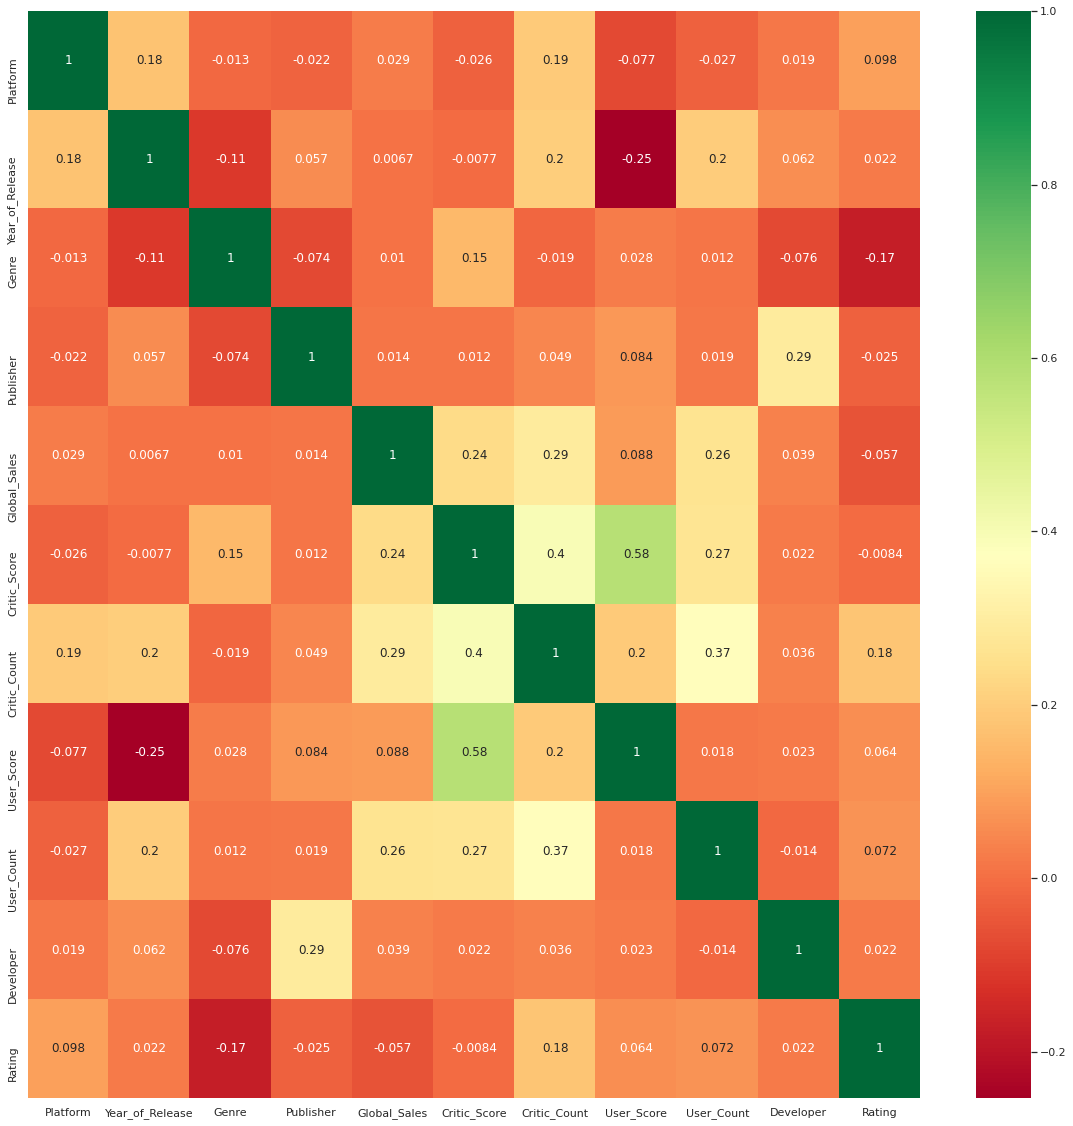

In [223]:
corrmat = Video_Games_Sales.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Video_Games_Sales[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [224]:
Video_Games_Sales.to_csv("Games_Sales_processed.csv")
Video_Games_Sales.sample(100)

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
9527,Green Lantern: Rise of the Manhunters,0,2011.0,0,249,0.13,42.0,6.0,3.9,7.0,476,2
4505,Payday 2,8,2013.0,8,4,0.43,74.0,12.0,6.2,181.0,813,4
9521,Otogi: Myth of Demons,15,2002.0,0,196,0.13,80.0,40.0,8.5,28.0,421,6
13438,Ride 2,9,2016.0,6,147,0.05,71.0,19.0,8.0,12.0,710,1
3490,Far Cry Instincts,15,2005.0,8,237,0.57,85.0,56.0,5.7,73.0,1189,4
...,...,...,...,...,...,...,...,...,...,...,...,...
15807,Pirates: Legend of the Black Buccaneer,7,2006.0,1,0,0.02,42.0,4.0,7.0,5.0,1252,6
7790,Peter Jackson's King Kong: The Official Game o...,10,2005.0,0,237,0.19,56.0,10.0,6.4,22.0,835,6
6081,Majin and the Forsaken Kingdom,8,2010.0,1,155,0.29,72.0,49.0,7.9,35.0,447,6
4653,Animal Crossing: Amiibo Festival,13,2015.0,3,160,0.41,46.0,20.0,4.4,173.0,777,1


Number of Genre: 12


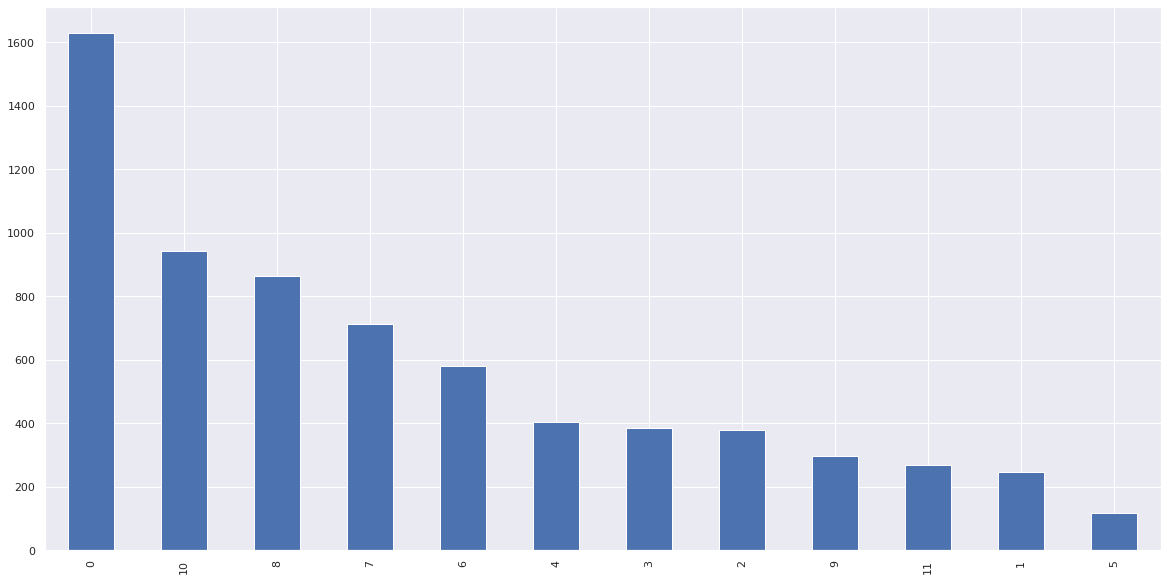

In [225]:
no_games_by_genre = Video_Games_Sales["Genre"].value_counts().sort_values(ascending=False)
print("Number of Genre:",len(no_games_by_genre))
no_games_by_genre.plot.bar(figsize=(20,10))

In [226]:
Video_Games_Sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   int8   
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   int8   
 4   Publisher        6825 non-null   int16  
 5   Global_Sales     6825 non-null   float64
 6   Critic_Score     6825 non-null   float64
 7   Critic_Count     6825 non-null   float64
 8   User_Score       6825 non-null   float64
 9   User_Count       6825 non-null   float64
 10  Developer        6825 non-null   int16  
 11  Rating           6825 non-null   int8   
dtypes: float64(6), int16(2), int8(3), object(1)
memory usage: 473.2+ KB


Classification of Best Games

In [227]:
# Average rating of games
avg_games_score = Video_Games_Sales['Critic_Score'].mean()
print('Average Game Critic Score = ', avg_games_score)

# Distribution of games according to their Critic Score
data = [go.Histogram(
        x = Video_Games_Sales['Critic_Score']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_games_score,
              'y0': 0,
              'x1': avg_games_score,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average Game Critic Score =  70.27208791208791


Critic Score VS Total Sales

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


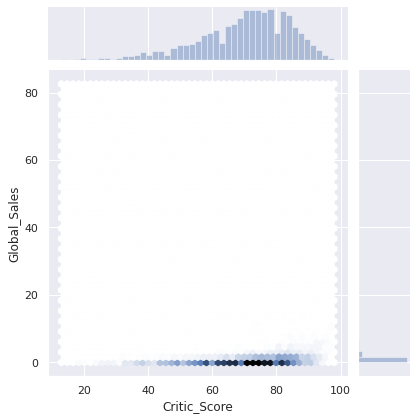

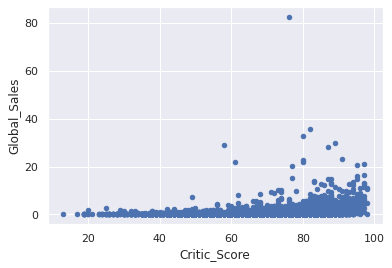

In [228]:
plot_critic_vs_sales = sns.jointplot(x=Video_Games_Sales["Critic_Score"], y=Video_Games_Sales["Global_Sales"], kind="hex")
plot_scatter = Video_Games_Sales.plot.scatter(x="Critic_Score", y="Global_Sales")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


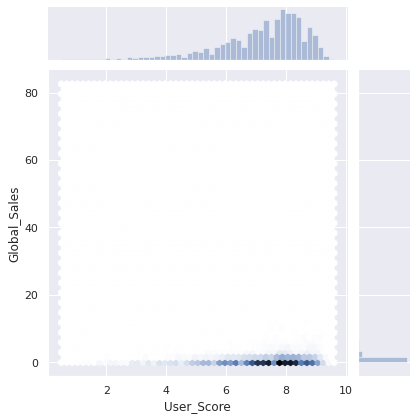

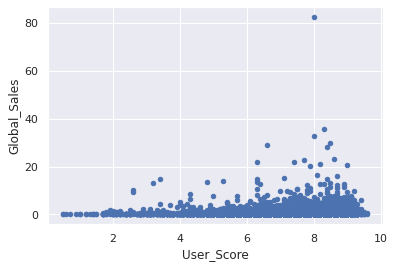

In [229]:
plot_score_vs_sales = sns.jointplot(x=Video_Games_Sales["User_Score"], y=Video_Games_Sales["Global_Sales"], kind="hex")
plot_scatter = Video_Games_Sales.plot.scatter(x="User_Score", y="Global_Sales")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


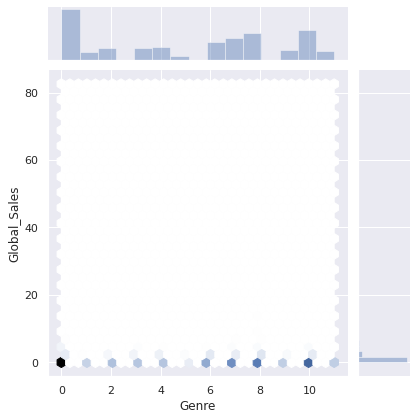

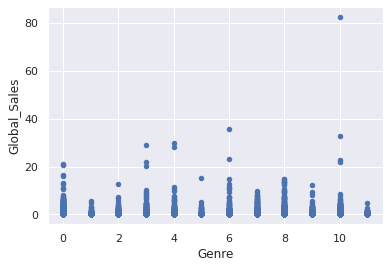

In [230]:
plot_genre_vs_sales = sns.jointplot(x=Video_Games_Sales["Genre"], y=Video_Games_Sales["Global_Sales"], kind="hex")
plot_scatter = Video_Games_Sales.plot.scatter(x="Genre", y="Global_Sales")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


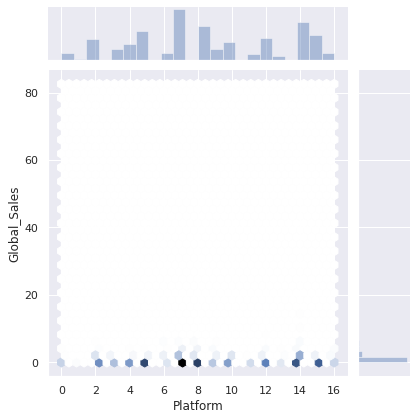

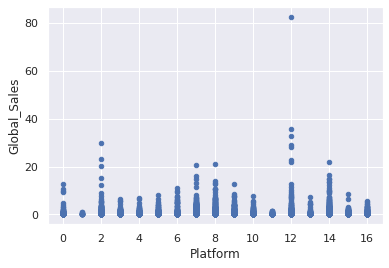

In [231]:
plot_platform_vs_sales = sns.jointplot(x=Video_Games_Sales["Platform"], y=Video_Games_Sales["Global_Sales"], kind="hex")
plot_scatter = Video_Games_Sales.plot.scatter(x="Platform", y="Global_Sales")

In [232]:
Video_Games_Sales.describe()


,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,8.588571,2007.436777,5.095971,131.284396,0.777590,70.272088,28.931136,7.185626,174.722344,648.199853,3.508278
std,4.289097,4.211248,3.811582,81.638341,1.963443,13.868572,19.224165,1.439942,587.428538,376.234483,2.108355
min,0.000000,1985.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,0.000000,0.000000
25%,5.000000,2004.000000,1.000000,61.000000,0.110000,62.000000,14.000000,6.500000,11.000000,329.000000,1.000000
50%,8.000000,2007.000000,6.000000,144.000000,0.290000,72.000000,25.000000,7.500000,27.000000,622.000000,4.000000
75%,12.000000,2011.000000,8.000000,207.000000,0.750000,80.000000,39.000000,8.200000,89.000000,989.000000,6.000000
max,16.000000,2016.000000,11.000000,261.000000,82.530000,98.000000,113.000000,9.600000,10665.000000,1288.000000,6.000000


In [0]:
featuresColumn = Video_Games_Sales.iloc[:, Video_Games_Sales.columns != 'Global_Sales'].values
labelColumn = Video_Games_Sales.iloc[:, 4].values